## Taxi Fare Trip Prediction

In [54]:
# Download data
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet -O dataset/green_tripdata_2021-01.parquet
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-02.parquet -O dataset/green_tripdata_2021-02.parquet

--2025-10-23 20:40:55--  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 3.164.82.40, 3.164.82.112, 3.164.82.160, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|3.164.82.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1145679 (1.1M) [binary/octet-stream]
Saving to: ‘dataset/green_tripdata_2021-02.parquet’

dataset/green_tripd 100%[===================>]   1.09M   810KB/s    in 1.4s    

2025-10-23 20:40:59 (810 KB/s) - ‘dataset/green_tripdata_2021-02.parquet’ saved [1145679/1145679]



In [3]:

# !pip install pandas
# !pip install matplotlib
# !pip install numpy
# !pip install seaborn

In [55]:
import pandas as pd
from typing import Literal

def get_data(split_type:Literal["train","test"])->pd.DataFrame:
    path = (
        "dataset/green_tripdata_2021-01.parquet"
        if split_type == "train" 
        else "dataset/green_tripdata_2021-02.parquet"
    )
    data = pd.read_parquet(path)
    return data

df = get_data()

In [39]:
# Let's define Target Y
# It could be fare_amount, or total_amount (which is a sum of fare_amount, extra, mta_tax, tip_amount, tolls_amount, ehail_fee, improvement_surcharge, congestion_surcharge)
# Let's choose total_amount since ..
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,0.50,0.5,0.00,0.00,None,0.3,6.80,2.0,1.0,0.00
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,0.50,0.5,2.81,0.00,None,0.3,16.86,1.0,1.0,2.75
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,0.50,0.5,1.00,0.00,None,0.3,8.30,1.0,1.0,0.00
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,0.50,0.5,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.00,0.00,-0.5,0.00,0.00,None,-0.3,-52.80,3.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,2.75,0.0,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,0.00,0.0,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,2.75,0.0,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,2.75,0.0,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN


In [40]:
# Since the purpose of this notebook is to train simple model to predict the duration

# Target y
col_y = "duration"
df[col_y] = df["lpep_dropoff_datetime"] - df["lpep_pickup_datetime"]
df[col_y] = df[col_y].map(lambda td: td.total_seconds() / 60)

# Feature X (Manually pick based on common sense)
list_cat_feature = ['PULocationID', 'DOLocationID']
list_con_feature = ['trip_distance']

# Filter & Combine
df_selected = df[[col_y] + list_cat_feature + list_con_feature]
df_selected[list_cat_feature] = df_selected[list_cat_feature].astype(str)
df_selected[list_con_feature] = df_selected[list_con_feature].astype(float)

/var/folders/gx/6qyz59vn1yq83q873v9_4y7m0000gn/T/ipykernel_13957/1715973033.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[list_cat_feature] = df_selected[list_cat_feature].astype(str)
/var/folders/gx/6qyz59vn1yq83q873v9_4y7m0000gn/T/ipykernel_13957/1715973033.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[list_con_feature] = df_selected[list_con_feature].astype(float)


In [41]:
# No row contains null
display(df_selected[df_selected.isnull().any(axis=1)])

,duration,PULocationID,DOLocationID,trip_distance


In [42]:
df_selected.describe(percentiles=[0.02,0.1,0.2,0.3,0.95,0.98,0.99])

,duration,trip_distance
count,76518.000000,76518.000000
mean,19.927896,40.862552
std,59.338594,1924.408778
min,0.000000,0.000000
2%,1.016667,0.000000
10%,4.750000,0.700000
20%,7.000000,1.110000
30%,9.000000,1.500000
50%,13.883333,2.590000
95%,44.000000,16.120000


In [43]:
# Drop the duration=0 out, since they might be cancelled or something
display(df_selected.query("duration < 0.01").describe())

df_selected = df_selected.query("duration != 0")

,duration,trip_distance
count,66.0,66.000000
mean,0.0,0.006970
std,0.0,0.024556
min,0.0,0.000000
25%,0.0,0.000000
50%,0.0,0.000000
75%,0.0,0.000000
max,0.0,0.140000


In [44]:
df_selected.describe(percentiles=[0.02,0.1,0.2,0.3,0.95,0.98,0.99])

,duration,trip_distance
count,76452.000000,76452.000000
mean,19.945100,40.897822
std,59.361312,1925.238894
min,0.016667,0.000000
2%,1.116667,0.000000
10%,4.783333,0.700000
20%,7.000000,1.110000
30%,9.000000,1.500000
50%,13.916667,2.590000
95%,44.000000,16.124500


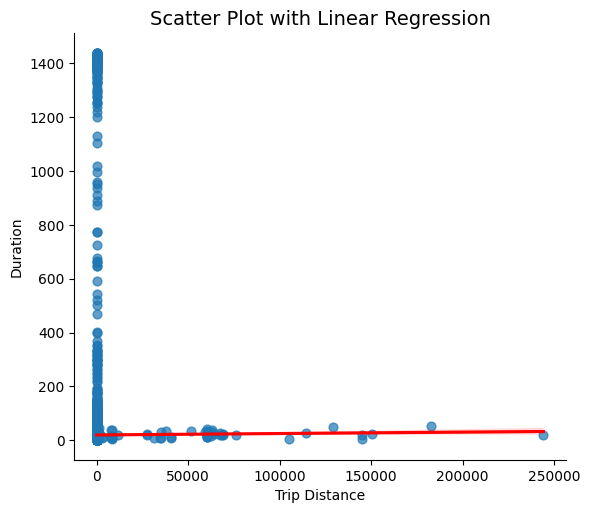

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: assuming your DataFrame has columns 'x' and 'y'
sns.lmplot(
    data=df_selected,
    x='trip_distance',
    y='duration',
    height=5,
    aspect=1.2,
    line_kws={'color': 'red'},  # regression line style
    scatter_kws={'s': 40, 'alpha': 0.7}  # scatter point style
)

plt.title("Scatter Plot with Linear Regression", fontsize=14)
plt.xlabel("Trip Distance")
plt.ylabel("Duration")
plt.show()

In [46]:
# Drop the duration=0 out, since they might be cancelled or something
display(df_selected.query("trip_distance == 0").describe())


# It is pretty weird to see trip_distance but duration is high. Let's drop it
df_selected = df_selected.query("trip_distance != 0")

,duration,trip_distance
count,2494.000000,2494.0
mean,16.222140,0.0
std,70.962163,0.0
min,0.016667,0.0
25%,0.350000,0.0
50%,7.441667,0.0
75%,21.000000,0.0
max,1439.600000,0.0


In [50]:
display(df_selected.query("trip_distance == 0").describe())

,duration,trip_distance
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


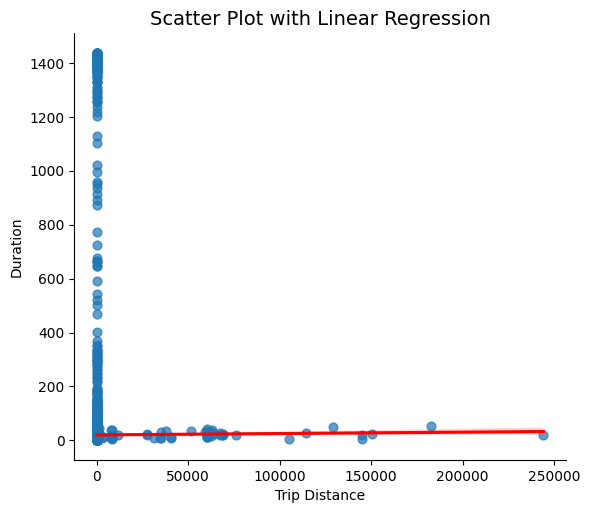

In [49]:
# Example: assuming your DataFrame has columns 'x' and 'y'
sns.lmplot(
    data=df_selected,
    x='trip_distance',
    y='duration',
    height=5,
    aspect=1.2,
    line_kws={'color': 'red'},  # regression line style
    scatter_kws={'s': 40, 'alpha': 0.7}  # scatter point style
)

plt.title("Scatter Plot with Linear Regression", fontsize=14)
plt.xlabel("Trip Distance")
plt.ylabel("Duration")
plt.show()

# In fact, it still appears, the trip distance which is lower than 10k  

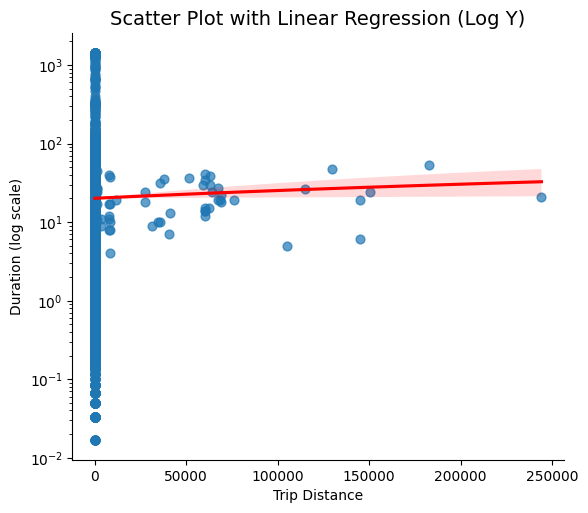

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(
    data=df_selected,
    x='trip_distance',
    y='duration',
    height=5,
    aspect=1.2,
    line_kws={'color': 'red'},
    scatter_kws={'s': 40, 'alpha': 0.7}
)

plt.yscale('log')
plt.title("Scatter Plot with Linear Regression (Log Y)", fontsize=14)
plt.xlabel("Trip Distance")
plt.ylabel("Duration (log scale)")
plt.show()

In [75]:
def preprocess_data(df):
    # Target y
    col_y = "duration"
    df[col_y] = df["lpep_dropoff_datetime"] - df["lpep_pickup_datetime"]
    df[col_y] = df[col_y].map(lambda td: td.total_seconds() / 60)
    
    # Feature X (Manually pick based on common sense)
    list_cat_feature = ['PULocationID', 'DOLocationID']
    list_con_feature = ['trip_distance']
    
    # Filter & Combine
    df_selected = df[[col_y] + list_cat_feature + list_con_feature]
    df_selected[list_cat_feature] = df_selected[list_cat_feature].astype(str)
    df_selected[list_con_feature] = df_selected[list_con_feature].astype(float)

    # Filter out
    df_selected = df_selected.query("trip_distance != 0")
    df_selected = df_selected.query("duration != 0")

    # Feature Engineer
    df_selected['PU_DO'] = df_selected['PULocationID'] + '_' + df_selected['DOLocationID']
    return df_selected

In [80]:
df_train = preprocess_data(get_data("train"))
df_test = preprocess_data(get_data("test"))

/var/folders/gx/6qyz59vn1yq83q873v9_4y7m0000gn/T/ipykernel_13957/252132478.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[list_cat_feature] = df_selected[list_cat_feature].astype(str)
/var/folders/gx/6qyz59vn1yq83q873v9_4y7m0000gn/T/ipykernel_13957/252132478.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[list_con_feature] = df_selected[list_con_feature].astype(float)
/var/folders/gx/6qyz59vn1yq83q873v9_4y7m0000gn/T/ipykernel_13957/252132478.py:21: SettingWithCopyWarning: 

In [90]:
# Let's change strategy to reduce the possible combinations of cat feature
list_cat_feature = ['PU_DO']
list_con_feature = ['trip_distance']

train_dicts = df_train[list_cat_feature + list_con_feature].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

test_dicts = df_test[list_cat_feature + list_con_feature].to_dict(orient='records')
X_test = dv.transform(test_dicts)

y_train = df_train[col_y].values
y_test = df_test[col_y].values

In [91]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print("Test RMSE : ", root_mean_squared_error(y_train_pred, y_train))
print("Test RMSE : ", root_mean_squared_error(y_test_pred, y_test))

Test RMSE :  56.042533907694384
Test RMSE :  53.88483117149993


/var/folders/gx/6qyz59vn1yq83q873v9_4y7m0000gn/T/ipykernel_13957/1683998758.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred, label='prediction')
/var/folders/gx/6qyz59vn1yq83q873v9_4y7m0000gn/T/ipykernel_13957/1683998758.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,

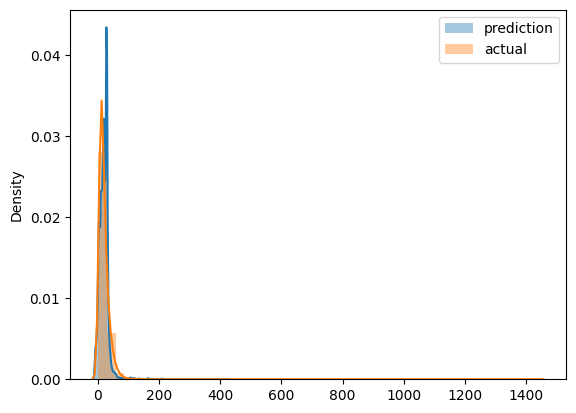

In [92]:
sns.distplot(y_test_pred, label='prediction')
sns.distplot(y_test, label='actual')

plt.legend()

In [ ]:
import pickle

with open('artifacts/models/lr.pkl', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

- Next, we will improve and add into MlOps experiment tracking